# Imports

In [704]:
#MSE != 29, 

In [705]:
import numpy as np
import matplotlib.pyplot as plt

In [706]:
#Load data
data_file_path = "PCB.dt"
data_matrix = np.loadtxt(data_file_path)

# Data

In [707]:
X_, Y_ = [], []
for elm in data_matrix:
    X_.append(elm[0])
    Y_.append(elm[1])
X, Y = np.array(X_), np.array(Y_)
Y = Y.reshape(28,1)
foo = np.ones_like(X).reshape(28, 1)
X = X.reshape(28, 1)
X = np.hstack((X, foo))
X = X.reshape(28, 2)
print(X.T)
print(Y.T)

[[ 1.  6.  1.  6.  1.  6.  1.  7.  2.  7.  2.  7.  2.  8.  3.  8.  3.  8.
   3.  9.  4. 11.  4. 12.  4. 12.  5. 12.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 0.6  3.4  1.6  9.7  0.5  8.6  1.2  4.   2.   5.5  1.3 10.5  2.5 17.5
   2.2 13.4  2.4  4.5  1.2 30.4  3.5 12.4  4.1 13.4  5.1 26.2  5.7  7.4]]


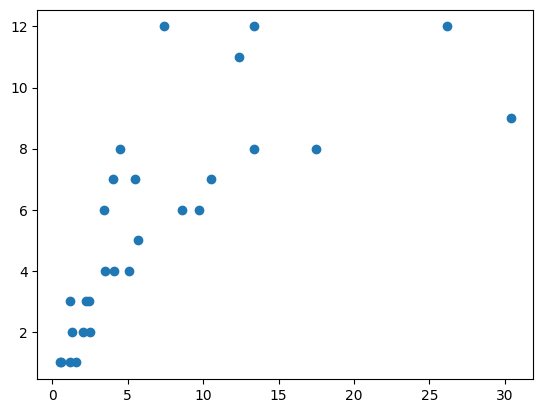

In [708]:
plt.scatter(Y_, X_)

# Model

In [709]:
def linreg(X, y):
    w = np.dot(X.T, X)
    w = np.linalg.inv(w)
    w = np.dot(w, X.T)
    w = np.dot(w, y)
    return w

linreg(X, Y)


array([[ 1.55777052],
       [-1.45194395]])

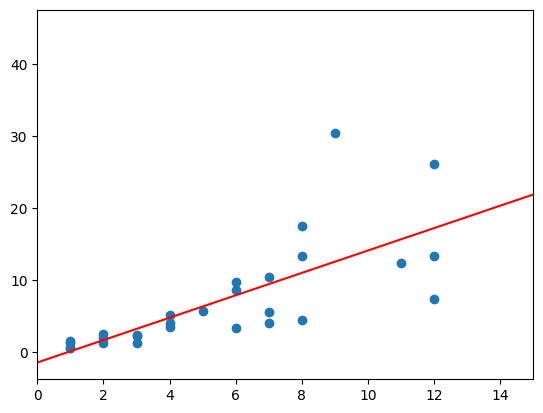

In [710]:
#PLot the funtion
def plot1(a, b, y_val, x_val):
    x = np.linspace(0, 30, 50)
    y = (a) * x + (b)
    plt.plot(x, y, color = 'red')
    plt.scatter(x_val, y_val)
    plt.xlim(0, 15)
    plt.show()
plot1(1.55777052, -1.45194395, Y_, X_)

[[0.25912824]
 [0.03147247]]


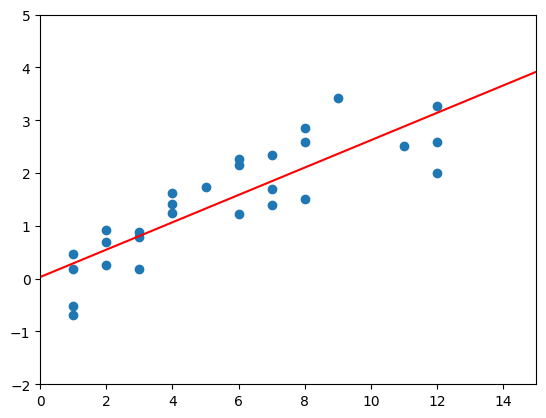

In [711]:
def affLin(X, y):
    y = np.log(y)
    return linreg(X, y)
parameters = affLin(X, Y)
print(parameters)

def plot2(a, b, y_val, x_val):
    x = np.linspace(0, 15, 100)
    y = (a) * x + (b)
    plt.plot(x, y, color = 'red')
    plt.scatter(x_val, y_val)
    plt.xlim(0, 15)
    plt.ylim(-2, 5)
    plt.show()
plot2(0.25912824, 0.03147247, np.log(Y), X_)

In [716]:
def h(x):
    return np.exp(parameters[0] * x + parameters[1])

def MSE(x, y):
    y = y.reshape(28,)

    vfunc = np.vectorize(h)
    pred = vfunc(x)
    pred = pred.reshape(28,)
    diff = y - pred
    mse = (diff.dot(diff)) / len(y)
    print(mse)

MSE(X_, Y)



34.83556116722035


In [ ]:
# r^2 = 1-MSE/var(y)